In [1]:
using QuantumDynamics
using Plots, LaTeXStrings

In [2]:
invcm2au = 4.55634e-6

4.55634e-6

In [3]:
β = 1052.0
dt = 200.0
ntimes = 200
H = [50+0.0im 100.0; 100.0 -50] .* invcm2au

2×2 Matrix{ComplexF64}:
 0.000227817+0.0im   0.000455634+0.0im
 0.000455634+0.0im  -0.000227817+0.0im

In [4]:
fbU = Propagators.calculate_bare_propagators(; Hamiltonian=H, ntimes, dt);

In [5]:
o1 = [1.0+0.0im 0.0; 0.0 0.0]
o2 = [0.0+0.0im 0.0; 0.0 1.0]
ρ0 = [1.0+0.0im 0.0; 0.0 0.0]

2×2 Matrix{ComplexF64}:
 1.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im

# Figure 4b

In [6]:
J1 = SpectralDensities.DrudeLorentz(; λ=20*invcm2au, γ=53.08*invcm2au, Δs=1.0)
J2 = SpectralDensities.DrudeLorentz(; λ=20*invcm2au, γ=53.08*invcm2au, Δs=1.0)

QuantumDynamics.SpectralDensities.DrudeLorentz(9.11268e-5, 0.0002418505272, 1.0, 0.02418505272)

In [7]:
times_TNPI, ρs_TNPI = TNPI.propagate(; fbU, ntimes, dt, β, ρ0, Jw=[J1, J2], svec=[1.0 0.0; 0.0 1.0], kmax=300)

(0.0:200.0:40000.0, [1.0 + 0.0im 0.0 + 0.0im; 0.9917245990732751 - 1.3105164659443635e-18im 0.0040907052393270305 + 0.09032123417323919im; … ; 0.40621888943638756 + 5.272237940461296e-6im -0.17356091953548725 - 0.0018531886022586659im; 0.40660090657371734 - 5.7052679510052615e-6im -0.17426443928666419 - 0.002338111535735006im;;; 0.0 + 0.0im 0.0 + 0.0im; 0.004090705239327055 - 0.09032123417323916im 0.008275400926724715 - 1.3552527156068805e-19im; … ; -0.1735704648037007 + 0.0018552500152434342im 0.59345749097124 - 5.323965177411738e-6im; -0.1742563360926409 + 0.0023334779296864086im 0.5930743204026782 + 5.664738071814446e-6im])

In [8]:
times_HEOM, ρs_HEOM = HEOM.propagate(; Hamiltonian=H, Jw=[J1, J2], sys_ops=[o1, o2], β, dt, ntimes, ρ0, num_modes=2, Lmax=6)

([0.0, 200.0, 400.0, 600.0, 800.0, 1000.0, 1200.0, 1400.0, 1600.0, 1800.0  …  38200.0, 38400.0, 38600.0, 38800.0, 39000.0, 39200.0, 39400.0, 39600.0, 39800.0, 40000.0], [1.0 + 0.0im 0.0 + 0.0im; 0.9917358495989539 + 0.0im 0.0040954266269663565 - 0.09025877798133093im; … ; 0.40698835024958274 + 0.0im -0.17270299465475378 + 0.0004916587993215258im; 0.40712004896234266 + 0.0im -0.1733273103115845 + 0.0009360575155116358im;;; 0.0 + 0.0im 0.0 + 0.0im; 0.0040954266269663565 + 0.09025877798133093im 0.008264150401046132 + 0.0im; … ; -0.17270299465475378 - 0.0004916587993215258im 0.5930116497504159 + 0.0im; -0.1733273103115845 - 0.0009360575155116358im 0.5928799510376559 + 0.0im])

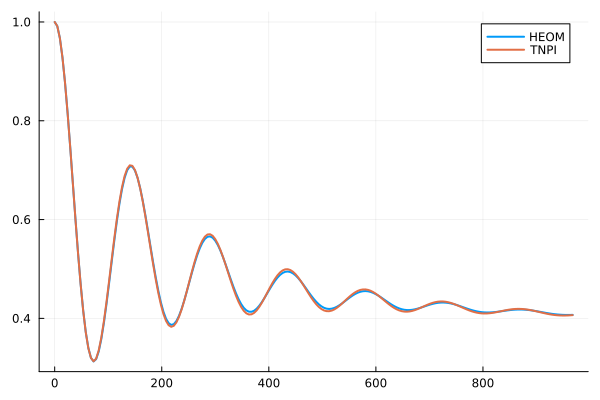

In [9]:
plot(times_HEOM .* 0.02418884, real.(ρs_HEOM[:,1,1]), lw=2, label="HEOM")
plot!(times_TNPI .* 0.02418884, real.(ρs_TNPI[:,1,1]), lw=2, label="TNPI")

# Figure 4c

In [10]:
J1 = SpectralDensities.DrudeLorentz(; λ=100*invcm2au, γ=53.08*invcm2au, Δs=1.0)
J2 = SpectralDensities.DrudeLorentz(; λ=100*invcm2au, γ=53.08*invcm2au, Δs=1.0)

QuantumDynamics.SpectralDensities.DrudeLorentz(0.000455634, 0.0002418505272, 1.0, 0.02418505272)

In [11]:
times_TNPI, ρs_TNPI = TNPI.propagate(; fbU, ntimes, dt, β, ρ0, Jw=[J1, J2], svec=[1.0 0.0; 0.0 1.0], kmax=300)

(0.0:200.0:40000.0, [1.0 + 0.0im 0.0 + 0.0im; 0.9917245990732756 + 5.86947778498656e-20im 0.003904401030166797 + 0.08961941818343029im; … ; 0.3909369053685887 + 1.0305763127716356e-14im -0.1903000552885631 + 0.0003003990893212897im; 0.3908997652192811 + 9.435431827280507e-15im -0.19031800089835235 + 0.0002951912362777656im;;; 0.0 + 0.0im 0.0 + 0.0im; 0.0039044010301667455 - 0.08961941818343028im 0.008275400926724737 - 3.903127820947816e-18im; … ; -0.19030005528855853 - 0.0003003990893088259im 0.6088572856652322 - 8.826273045769994e-15im; -0.19031800089834697 - 0.00029519123626763793im 0.6088919236150742 - 1.0103029524088925e-14im])

In [12]:
times_HEOM, ρs_HEOM = HEOM.propagate(; Hamiltonian=H, Jw=[J1, J2], sys_ops=[o1, o2], β, dt, ntimes, ρ0, num_modes=2, Lmax=6)

([0.0, 200.0, 400.0, 600.0, 800.0, 1000.0, 1200.0, 1400.0, 1600.0, 1800.0  …  38200.0, 38400.0, 38600.0, 38800.0, 39000.0, 39200.0, 39400.0, 39600.0, 39800.0, 40000.0], [1.0 + 0.0im 0.0 + 0.0im; 0.9917805082593008 + 0.0im 0.003928405403275599 - 0.08931473934178356im; … ; 0.3908930652620197 + 0.0im -0.18985346000965728 - 0.0002437813845367719im; 0.3908492126795399 + 0.0im -0.18987500181747868 - 0.000237471667731799im;;; 0.0 + 0.0im 0.0 + 0.0im; 0.003928405403275599 + 0.08931473934178356im 0.008219491740699527 + 0.0im; … ; -0.18985346000965728 + 0.0002437813845367719im 0.6091069347379815 + 0.0im; -0.18987500181747868 + 0.000237471667731799im 0.6091507873204612 + 0.0im])

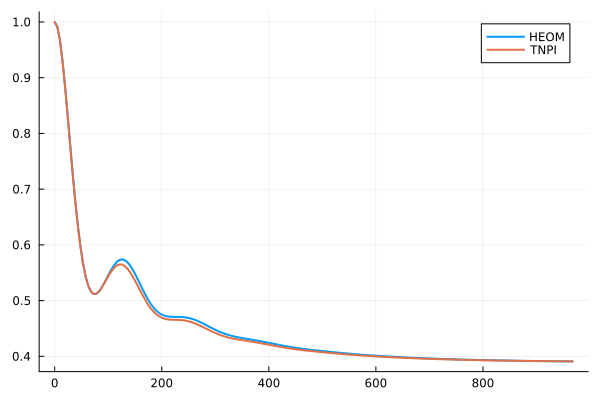

In [13]:
plot(times_HEOM .* 0.02418884, real.(ρs_HEOM[:,1,1]), lw=2, label="HEOM")
plot!(times_TNPI .* 0.02418884, real.(ρs_TNPI[:,1,1]), lw=2, label="TNPI")